In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import acquire
import prepare
import split
import matplotlib.pyplot as plt
import itertools
import scipy.stats as stats
import exploration


alpha = 0.05

In [ ]:
"""In a jupyter notebook, classification_exercises.ipynb, use a python 
module (pydata or seaborn datasets) containing datasets as a source 
from the iris data. Create a pandas dataframe, df_iris, from this data."""

df_iris = sns.load_dataset('iris')

# print the first 3 rows
print(df_iris.head(3))

# print the number of rows and columns (shape)
print(f"shape: {df_iris.shape}")

# print the column names
print(df_iris.columns)

# print the data type of each column
print(df_iris.info())

# print the summary statistics for each of the numeric variables
print(df_iris.describe())

In [ ]:
"""Read the Table1_CustDetails table from your spreadsheet exercises 
google sheet into a dataframe named df_google_sheets.

Make sure that the spreadsheet is publicly visible under your sharing 
settings."""

sheet_url = 'https://docs.google.com/spreadsheets/d/1luAKJGwksBk-zCOyqBhYRG2gc5J8X-vhAd9Cm2bLbPw/edit#gid=1023018493'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')


df_google_sheets = pd.read_csv(csv_export_url)


# assign the first 100 rows to a new dataframe, df_google_sheets_sample
df_google_sheets_sample = df_google_sheets[0:100]


# print the number of rows of your original dataframe
print(len(df_google_sheets))

# print the first 5 column names
print(df_google_sheets.columns[0:5])

# print the column names that have a data type of object
# instructor answer: df.select_dtypes(include='object').columns.to_list()
print(df_google_sheets.dtypes[df_google_sheets.dtypes == 'object'])
print(df_google_sheets.info())

# compute the range for each of the numeric variables.
df_column_mask = df_google_sheets.apply(pd.api.types.is_float_dtype)
float_columns = df_google_sheets.dtypes[df_column_mask].index.to_list()

print(df_google_sheets[float_columns].apply(lambda x: x.max() - x.min()))

In [ ]:
"""Read the data from this google sheet into a dataframe, df_google."""

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')


df_google = pd.read_csv(csv_export_url)

# print the first 3 rows
print(df_google.head(3))

# print the number of rows and columns
print(df_google.shape)

# print the column names
print(df_google.columns)

# print the data type of each column
print(df_google.info())

# print the summary statistics for each of the numeric variables
df_column_mask = df_google.apply(pd.api.types.is_numeric_dtype)
numeric_columns = df_google.dtypes[df_column_mask]

print(df_google[numeric_columns.index].info())

# print the unique values for each of your categorical variables
# categories = df_google.select_dtypes(include=['object', 'int64']).columns.to_list()
categories = ['Survived', 'Pclass', 'Sex', 'Parch', 'Embarked']
print(df_google[categories].apply(lambda x: x.nunique() if x.nunique() < 10 else 0))




In [ ]:
iris_data = acquire.get_iris_data()
iris_data.head()
col_drop = ['species_id', 'measurement_id']
iris_data = iris_data.drop(columns=col_drop)
print(iris_data.head())

iris_data = iris_data.rename(columns={'species_name': 'species'})
print(iris_data.head())

In [ ]:
missing = iris_data.isnull().sum()
(missing[missing] > 0).sum()

dummy_df = pd.get_dummies(iris_data['species'], dummy_na=False, drop_first=True)
print(dummy_df)
iris_data = pd.concat([iris_data, dummy_df], axis=1)
iris_data


In [ ]:
def prep_iris(iris_df):
    col_drop = ['species_id', 'measurement_id']
    iris_data = iris_data.drop(columns=col_drop)
    

    iris_data = iris_data.rename(columns={'species_name': 'species'})
    print(iris_data.head())
    
    dummy_df = pd.get_dummies(iris_data['species'], dummy_na=False, drop_first=True)
    iris_data = pd.concat([iris_data, dummy_df], axis=1)
    
    return iris_data


In [ ]:
titanic_df = acquire.get_titanic_data()

def prep_titanic(titanic_df):
    
    col_drop = ['class', 'deck', 'Unnamed: 0', 'embark_town']
    titanic_df = titanic_df.drop(columns=col_drop)
    print(titanic_df.shape)
    titanic_df = titanic_df.dropna()
    print(titanic_df.shape)
    titanic_dummy = pd.get_dummies(titanic_df[['embarked', 'sex']], dummy_na=False, drop_first=[True, True])
    
    titanic_df = pd.concat([titanic_df, titanic_dummy], axis=1)

    return titanic_df

titanic_df = acquire.get_titanic_data()
titanic_df = prep_titanic(titanic_df)
titanic_df


In [ ]:
telco_df = acquire.get_telco_data()
print(telco_df.columns.to_list())
print(telco_df[['phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection']])
print(telco_df.info())


for c in telco_df.columns:
    print('------------------------')
    print(telco_df[c].value_counts())
    print(telco_df[c].value_counts().sum())
    
blanks = telco_df['total_charges'] != ' '
telco_df = telco_df[blanks]
telco_df.shape

In [ ]:


duplicates = ['contract_type_id', 'payment_type_id', 'internet_service_type_id', 'customer_id']
categorical = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type', 'payment_type', 'contract_type']
lst_true = [True] * len(categorical)
print(lst_true)
telco_df = telco_df.drop(columns=duplicates)
dummies_df = pd.get_dummies(telco_df[categorical], dummy_na=False, drop_first=lst_true)
dummies_df

telco_df = pd.concat([telco_df, dummies_df], axis=1)



In [ ]:
iris_df = acquire.get_iris_data()
iris_df = prepare.prep_iris(iris_df)

train, validate, test = split.train_validate_test_split(iris_df, 'species')

train.head()

quantitative_col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
categorical = ['species']


def quantitative_hist_boxplot_describe(training_df, quantitative_col_names):
    for col in quantitative_col_names:
        training_df[col].hist()
        plt.xlabel(col)
        plt.show()
    training_df.boxplot(column=quantitative_col_names)
    print(training_df[quantitative_col_names].describe().T)
    plt.show()
    
quantitative_hist_boxplot_describe(train, quantitative_col)




In [ ]:
a_species = train.species.unique()
a_species

def target_freq_hist_count(training_df, target_col):
    training_df[target_col].hist()
    print(training_df[target_col].value_counts())
    plt.show()

target_freq_hist_count(train, 'species')


In [ ]:
# Takeaways: Petal width seems to be distributed 3/4 ways, which could
# line up with our three different species. Same with sepal length.
# Those could be the two drivers that I look at that relates to species.


In [ ]:
"""Visualize each measurement type (y-axis) with the species variable 
(x-axis) using barplots, adding a horizontal line showing the overall 
mean of the metric (y-axis)."""

def odd(num):
    if num % 2 != 0:
        return True
    else:
        return False
    
def even(num):
    return not odd(num)

def find_subplot_dim(quant_col_lst):
    
    # goal: make x 
    # checks if len is even (making 2 rows)
    if even(len(quant_col_lst)):
        length = len(quant_col_lst)
    else:
        length = len(quant_col_lst) + 1
        
    divided_by_2 = int(length/ 2)
    divided_by_other_factor = int(length / divided_by_2)
    subplot_dim = [divided_by_2, divided_by_other_factor]
    
    return subplot_dim

def quant_vs_target_bar(train_df, target_col, quant_col_lst, mean_line=False):
    
    subplot_dim = find_subplot_dim(quant_col_lst)
    
    plots = []
    fig, axes = plt.subplots(subplot_dim[0], subplot_dim[1], sharex=True, figsize=(10,5))
    
    for axe in axes:
        for ax in axe:
            plots.append(ax)
    print(plots)

    for n in range(len(quant_col_lst)):    
        sns.barplot(ax=plots[n], x=train_df[target_col], y =train_df[quant_col_lst[n]])
        
        if mean_line:
            avg = train_df[quant_col_lst[n]].mean()
            plots[n].axhline(avg,  label=f'Avg {train_df[quant_col_lst[n]]}')
        

quant_vs_target_bar(train, 'species', quantitative_col, mean_line=True)

In [ ]:
"""For each measurement type, compute the descriptive statistics for 
each species."""

a_species


def describe_quant_grouped_by_target(training_df, quantitative_col, 
                                     target_col):
    lst_cpy = quantitative_col[:]
    lst_cpy.append(target_col)
    
    print(training_df[lst_cpy].groupby(target_col).describe().T)
    
describe_quant_grouped_by_target(train, quantitative_col, 'species')

In [ ]:
"""For virginica & versicolor: Compare the mean petal_width using 
the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is
a significant difference between the two groups. Do the same for the
other measurement types."""


def target_subsets(target_col, training_df):
    
    values = training_df[target_col].unique()
    subset_dict= {}
    
    for val in values:
        subset_dict[val] = training_df[training_df[target_col]==val]
        
    return subset_dict

def combinations_of_subsets(target_col, training_df):
    subsets = target_subsets(target_col, training_df)
    combos = list(itertools.combinations(subsets.keys(), 2))
    
    return subsets, combos

def mannshitneyu_for_quant_by_target(target_col, training_df, 
                                    quantitative_col):
    
    predictors = {}
    subsets, combos = combinations_of_subsets(target_col, training_df)
    p_exceeds_alpha = []
        

    for i, pair in enumerate(combos):
        
        #print(f'{pair[0]}/{pair[1]}:' )
        predictors[str(pair)] = []
        for col in quantitative_col:
            t, p = stats.mannwhitneyu(subsets[pair[0]][col], 
                                      subsets[pair[1]][col])
            #print(f'{pair[0]}/{pair[1]} {col}:')
            #print(f't: {t}, p: {p}\n')
            
            if p < alpha:
                predictors[str(pair)].append({col: [t, p]})
            else:
                p_exceeds_alpha.append([str(pair), col, t, p])
                
                
    return subsets, predictors, p_exceeds_alpha, combos
            
    
def print_mannswhitneyu_predictors(predictors):
    for keys, values in predictors.items():
        print(keys)
        for value in values:
            print(value)
        print()
    
def print_mannswhitneyu_failures(p_exceeds_alpha):
    for val in p_exceeds_alpha:
        print(f'Combination: {val[0]}')
        print(f'Measurement: {val[1]}')
        print(f't: {val[2]}, p: {val[3]}')
        print()
        
def print_quant_by_target(target_col, training_df, quant_col):
    subsets, predictors, p_exceeds_alpha, combos = mannshitneyu_for_quant_by_target(target_col, 
                                                                            training_df, 
                                                                            quant_col)
    print_mannswhitneyu_predictors(predictors)
    print_mannswhitneyu_failures(p_exceeds_alpha)
    
    combo_predic = {}
    for combo in combos:
        combo_predic[combo] = []
        print(predictors[str(combo)])
        for predic in predictors[str(combo)]:
              print(list(predic.keys())[0])
              combo_predic[combo].append(list(predic.keys())[0])

    return subsets, predictors, p_exceeds_alpha, combo_predic
    
subsets, predictors, p_exceeds_alpha, combos = print_quant_by_target('species', train, quantitative_col)


    


In [ ]:
# Takeaways: sepal width doesn't seem to be a good predictor in difference
# between virginica and versicolor. petal length and petal width seem to
# have the biggest differences.

# N_0: There is no difference in Petal length/Petal width between virginica/versicolor.
# N_1: There is a significant difference in petal lenght/width between virginica/versicolor





In [ ]:
"""Visualize the interaction of each measurement type with the others 
using a pairplot (or scatter matrix or something similar) and add 
color to represent species.
"""

sns.pairplot(train, hue='species')

In [ ]:
"""Visualize two numeric variables by means of the species. 
Hint: sns.relplot with hue or col
"""
def two_quants_by_target_var(target_col, training_df, combo_predic, 
                         subtitle=""):
    
    for combo in combo_predic.keys():
        subplot_dim= find_subplot_dim(combo_predic[combo])
        
    
        plots = []
        fig, axes = plt.subplots(subplot_dim[0], subplot_dim[1], sharex=True, figsize=(10,5))
        
        for axe in axes:
            for ax in axe:
                plots.append(ax)
                
                
        
        predictors_comb = list(itertools.combinations(combo_predic[combo], 2))
    
        for i, pair in enumerate(predictors_comb):
            sns.scatterplot(x=training_df[pair[0]], y=training_df[pair[1]],
                           hue=training_df[target_col],
                           ax= plots[i])
        plt.show()

    

fig, axes = plt.subplots(1,3, figsize=(12,5))

fig.suptitle('Multivariate Measurements by Species')
our_predic = ['sepal_length', 'petal_length', 'petal_width']



predic_combos = list(itertools.combinations(our_predic, 2))

plots = [axes[0], axes[1], axes[2]]

for i, pair in enumerate(predic_combos):
    sns.scatterplot(x=train[pair[0]], y=train[pair[1]],hue=train.species, ax=plots[i])
plt.show()




# Telco Data Exploration

In [2]:
"""Explore your telco data to discover drivers of churn
"""

telco_df, categories, quant_cols = prepare.acquire_prep_telco()



target, validate, test = split.train_validate_test_split(telco_df, 'churn')
target.head()

,Unnamed: 0,is_female,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
5919,5919,1,0,0,0,58.0,1,1.0,1.0,1.0,...,1.0,0.0,0.0,1,71.10,4299.20,0,DSL,Credit card (automatic),One year
1915,1915,0,0,0,1,71.0,1,1.0,1.0,1.0,...,0.0,0.0,0.0,1,85.45,6028.95,0,Fiber optic,Credit card (automatic),One year
5054,5054,1,0,1,1,35.0,1,1.0,None,None,...,None,None,None,1,25.75,882.55,0,None,Electronic check,Month-to-month
2355,2355,0,0,1,1,1.0,1,0.0,None,None,...,None,None,None,0,19.20,19.20,0,None,Mailed check,Month-to-month
6279,6279,0,1,0,0,20.0,1,0.0,1.0,0.0,...,1.0,0.0,0.0,0,54.00,1055.90,0,DSL,Mailed check,One year


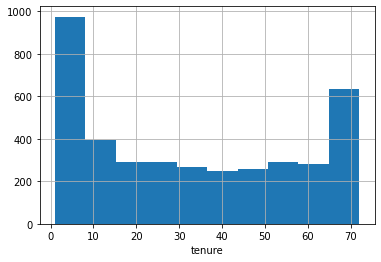

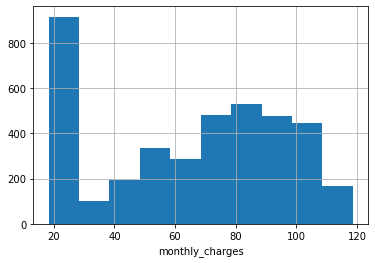

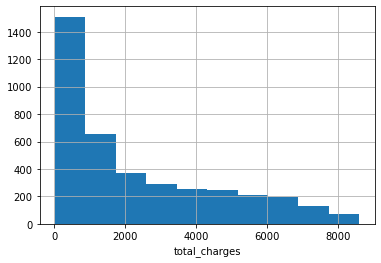

                  count         mean          std    min    25%      50%  \
tenure           3937.0    32.775210    24.709604   1.00    9.0    30.00   
monthly_charges  3937.0    64.805131    30.294804  18.25   34.7    70.25   
total_charges    3937.0  2316.775641  2284.984394  18.85  396.1  1414.80   

                    75%      max  
tenure             56.0    72.00  
monthly_charges    90.3   118.65  
total_charges    3893.6  8594.40  


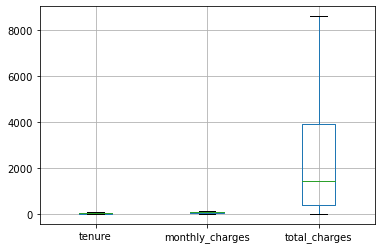

0    2891
1    1046
Name: churn, dtype: int64


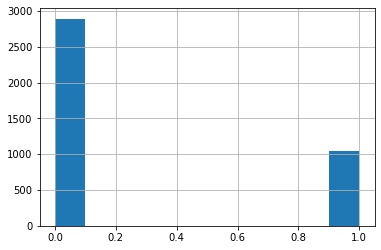

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]
churn                            0            1
tenure          count  2891.000000  1046.000000
                mean     38.003459    18.325048
                std      24.177715    19.960763
                min       1.000000     1.000000
                25%      15.000000     2.000000
                50%      39.000000    10.000000
                75%      61.000000    31.000000
                max      72.000000    72.000000
monthly_charges count  2891.000000  1046.000000
                mean     61.218091    74.719216
                std      31.349533    24.593969
                min      18.250000    18.850000
                25%      25.000000    59.525000
                50%      64.500000    79.850000
                75%      89.025000    94.237500
                max     118.650000   118.350000
total_charges   count  2891.000000  1046.000000
                mean   2583.071792  1580.769742
                std    

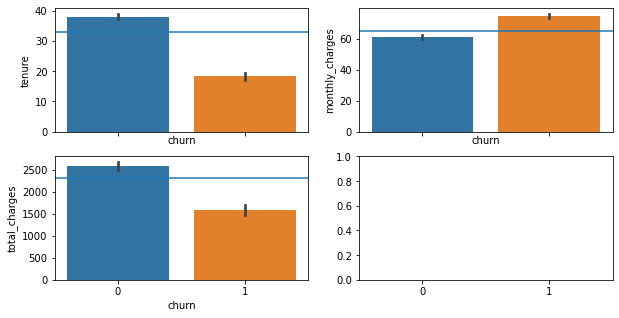

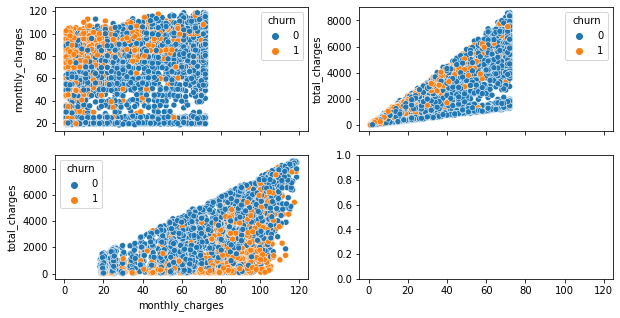

In [3]:
exploration.overview(target, quant_cols, 'churn')